In [50]:
# import libraries
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#load the datasets
data = pd.read_csv("./data/training_data.csv")

In [52]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [53]:
if isinstance(data, pd.DataFrame): #check if data is a dataframe
    print(data.info()) #print the info
else:
    print("The 'data' object is not a Pandas DataFrame.")
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB
None


In [54]:
null_values = data.isnull().sum() #checking for null values
print(f"null values: {null_values}")


null values: itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64


In [55]:
# defining the features and targets
features = ["itching", "skin_rash", "nodal_skin_eruptions", "continuous_sneezing", "shivering", "chills", "joint_pain", "stomach_pain", "acidity", "ulcers_on_tongue", "muscle_wasting", "vomiting" , "burning_micturition", "spotting_ urination", "fatigue", "weight_gain", "anxiety", "cold_hands_and_feets", "mood_swings", "weight_loss", "restlessness", "lethargy", "patches_in_throat", "irregular_sugar_level", "cough", "high_fever", "sunken_eyes", "breathlessness", "sweating", "dehydration", "indigestion", "headache", "yellowish_skin", "dark_urine", "nausea", "loss_of_appetite", "pain_behind_the_eyes", "back_pain", "constipation", "abdominal_pain", "diarrhoea", "mild_fever", "yellow_urine", "yellowing_of_eyes", "acute_liver_failure", "fluid_overload", "swelling_of_stomach", "swelled_lymph_nodes", "malaise","blurred_and_distorted_vision", "phlegm", "throat_irritation", "redness_of_eyes", "sinus_pressure", "runny_nose", "congestion", "chest_pain", "weakness_in_limbs", "fast_heart_rate", "pain_during_bowel_movements", "pain_in_anal_region", "bloody_stool","irritation_in_anus", "neck_pain", "dizziness", "cramps", "bruising", "obesity", "swollen_legs", "swollen_blood_vessels", "puffy_face_and_eyes", "enlarged_thyroid", "brittle_nails", "swollen_extremeties", "excessive_hunger", "extra_marital_contacts", "drying_and_tingling_lips","slurred_speech", "knee_pain", "hip_joint_pain", "muscle_weakness", "stiff_neck", "swelling_joints", "movement_stiffness", "spinning_movements", "loss_of_balance", "unsteadiness", "weakness_of_one_body_side", "loss_of_smell", "bladder_discomfort", "foul_smell_of urine", "continuous_feel_of_urine", "passage_of_gases", "internal_itching", "toxic_look_(typhos)", "depression", "irritability", "muscle_pain", "altered_sensorium", "red_spots_over_body", "belly_pain", "abnormal_menstruation", "dischromic _patches", "watering_from_eyes", "increased_appetite", "polyuria", "family_history", "mucoid_sputum", "rusty_sputum", "lack_of_concentration", "visual_disturbances", "receiving_blood_transfusion", "receiving_unsterile_injections", "coma", "stomach_bleeding", "distention_of_abdomen", "history_of_alcohol_consumption", "fluid_overload", "blood_in_sputum", "prominent_veins_on_calf", "palpitations", "painful_walking", "pus_filled_pimples", "blackheads", "scurring", "skin_peeling", "silver_like_dusting", "small_dents_in_nails", "inflammatory_nails", "blister", "red_sore_around_nose", "yellow_crust_ooze"]

target = "prognosis"

X = data[features]
y = data[target]

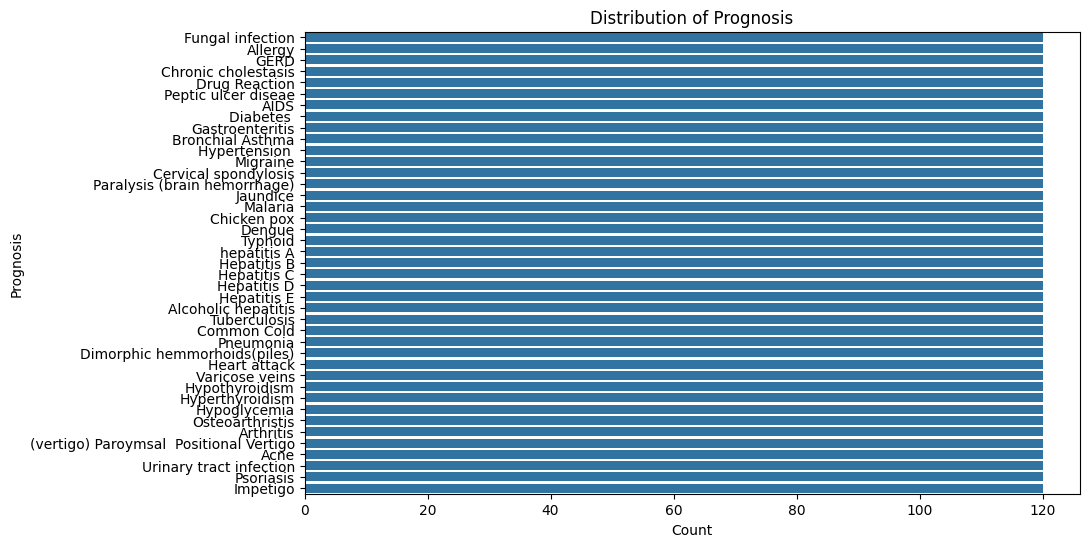

In [56]:
# Count plot for target variable
plt.figure(figsize=(10, 6))
sns.countplot(y)
plt.title('Distribution of Prognosis')
plt.xlabel('Count')
plt.ylabel('Prognosis')
plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [58]:
# Define label encoder
label_encoder = LabelEncoder()

# Encode target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Model: TensorFlow
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile your model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train your model
history = model.fit(X_train, y_train_encoded, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2)

# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/10
99/99 [==============================] - 1s 4ms/step - loss: -297.3183 - accuracy: 0.0235 - val_loss: -1269.8140 - val_accuracy: 0.0178
Epoch 2/10
99/99 [==============================] - 0s 3ms/step - loss: -6040.7886 - accuracy: 0.0241 - val_loss: -14213.2031 - val_accuracy: 0.0178
Epoch 3/10
99/99 [==============================] - 0s 3ms/step - loss: -31621.3105 - accuracy: 0.0241 - val_loss: -55042.1328 - val_accuracy: 0.0178
Epoch 4/10
99/99 [==============================] - 0s 4ms/step - loss: -92543.1250 - accuracy: 0.0241 - val_loss: -137832.4844 - val_accuracy: 0.0178
Epoch 5/10
99/99 [==============================] - 0s 3ms/step - loss: -202998.1406 - accuracy: 0.0241 - val_loss: -276803.4375 - val_accuracy: 0.0178
Epoch 6/10
99/99 [==============================] - 0s 3ms/step - loss: -376345.9688 - accuracy: 0.0241 - val_loss: -483723.5000 - val_accuracy: 0.0178
Epoch 7/10
99/99 [==============================] - 0s 3ms/step - loss: -622560.5000 - accuracy: 0.

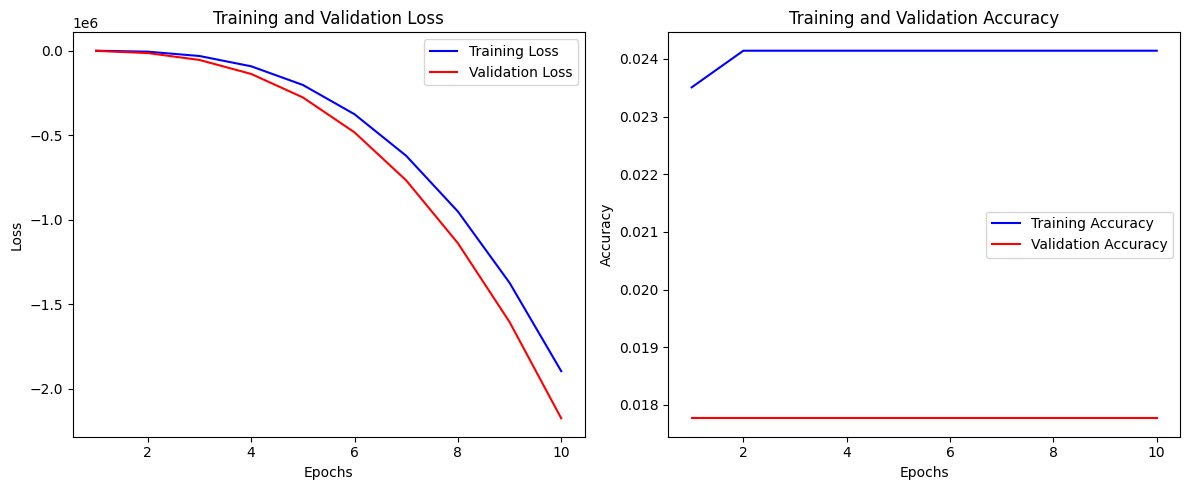

In [59]:
import matplotlib.pyplot as plt

# Get training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)

# Plotting
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [62]:
print(" Developed by Praise Joshua Chiemeka :)")

 Developed by Praise Joshua Chiemeka :)
